In [55]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [5]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
reg.score(x_test,y_test)

0.72647013796830096

In [8]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
pca = PCA(n_components=10, whiten='True')
x = pca.fit(df_x).transform(df_x)

In [28]:
pca.explained_variance_

array([  3.08284717e+04,   6.23792169e+03,   8.16747922e+02,
         2.66155981e+02,   5.00356236e+01,   2.78416349e+01,
         1.60690855e+01,   9.51546794e+00,   3.26682587e+00,
         1.17875328e+00])

In [29]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
reg.score(x_test,y_test)

0.69018378692138982

In [25]:
svd = TruncatedSVD(n_components = 10)
x = svd.fit(df_x).transform(df_x)
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
reg.score(x_test,y_test)

0.68223250209842634

In [31]:
df_x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [32]:
data=pd.read_csv('mnist.csv')

In [33]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
pred = rf.predict(x_test)

In [38]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [39]:
count/float(len(pred))

0.9615476190476191

In [44]:
pca = PCA(n_components=25, whiten='True')
x = pca.fit(df_x).transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [45]:
count/float(len(pred))

0.9434523809523809

In [46]:
pca.explained_variance_

array([ 334772.620528  ,  245879.21073201,  211046.60194948,
        184721.97518117,  168065.9998401 ,  147769.76432963,
        112531.94006026,   99313.07277501,   95013.75214537,
         80658.80966613,   72089.56446099,   70704.85314299,
         58464.65500507,   58129.27918648,   54294.9210048 ,
         50933.50304145,   45317.25479694,   44048.02861847,
         40794.10105348,   39584.60734333,   36817.50674808,
         34860.95757231,   33127.26842033,   31336.47034327,
         30447.66562396])

In [56]:
pca = PCA(n_components=2, whiten='True')
x = pca.fit(df_x).transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [57]:
count/float(len(pred))

0.4083333333333333

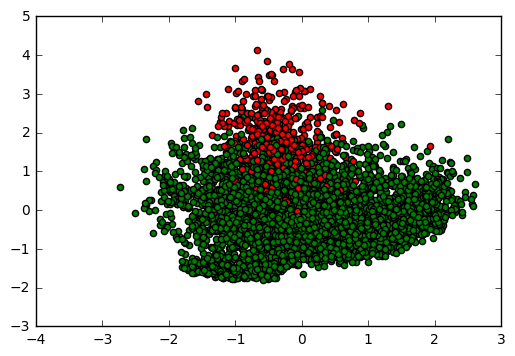

In [58]:
y = df_y.values
for i in range(5000):
    if y[i]==0:
        plt.scatter(x[i,1],x[i,0],c='r')
    else:
        plt.scatter(x[i,1],x[i,0],c='g')
plt.show()